## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [6]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[1024, 512, 256, 128, 64, 32, 16]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidd

In [8]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [9]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [10]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 136us/step - loss: 2.2806 - acc: 0.1273 - val_loss: 2.1723 - val_acc: 0.2120
Epoch 2/100
50000/50000 [==============================] - 4s 76us/step - loss: 2.0000 - acc: 0.2640 - val_loss: 1.8754 - val_acc: 0.2931
Epoch 3/100
50000/50000 [==============================] - 4s 74us/step - loss: 1.8290 - acc: 0.3332 - val_loss: 1.7554 - val_acc: 0.3673
Epoch 4/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.7298 - acc: 0.3694 - val_loss: 1.6654 - val_acc: 0.3981
Epoch 5/100
50000/50000 [==============================] - 4s 76us/step - loss: 1.6526 - acc: 0.4034 - val_loss: 1.5921 - val_acc: 0.4306
Epoch 6/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.5905 - acc: 0.4277 - val_loss: 1.5893 - val_acc: 0.4317
Epoch 7/100
50000/50000 [==============================] - 4s 74us/step -

Epoch 58/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.3534 - acc: 0.8738 - val_loss: 2.8104 - val_acc: 0.5059
Epoch 59/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.3060 - acc: 0.8912 - val_loss: 2.8473 - val_acc: 0.4948
Epoch 60/100
50000/50000 [==============================] - 4s 74us/step - loss: 0.3140 - acc: 0.8867 - val_loss: 2.9816 - val_acc: 0.4955
Epoch 61/100
50000/50000 [==============================] - 4s 74us/step - loss: 0.3162 - acc: 0.8882 - val_loss: 2.8628 - val_acc: 0.5042
Epoch 62/100
50000/50000 [==============================] - 4s 74us/step - loss: 0.3312 - acc: 0.8832 - val_loss: 2.8806 - val_acc: 0.4996
Epoch 63/100
50000/50000 [==============================] - 4s 74us/step - loss: 0.2866 - acc: 0.8976 - val_loss: 3.0894 - val_acc: 0.4969
Epoch 64/100
50000/50000 [==============================] - 4s 75us/step - loss: 0.3121 - acc: 0.8909 - val_loss: 2.9596 - val_acc: 0.4921
Epoch 65/100
50000/50000 [=

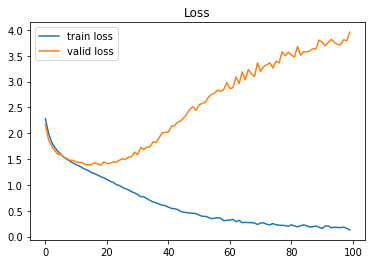

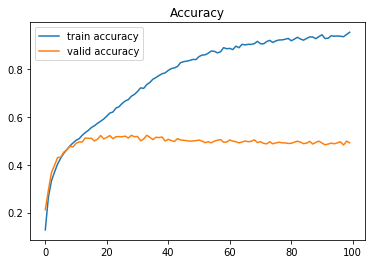

In [12]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()